## Kernelized Support Vector Machines

## Linear models and non linear features

Text(0, 0.5, 'feature 1')

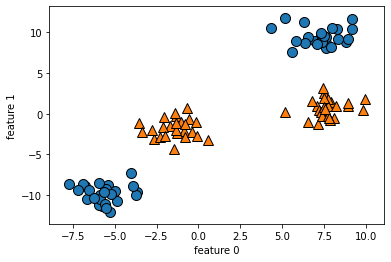

In [2]:
# make synthetic datasets

from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X,y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

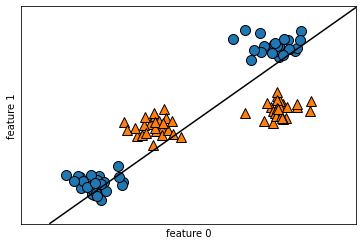

In [3]:
# using linear model for classification
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

(100, 3)
float64
[[-1.72161036e+00 -1.48033142e+00  2.19138111e+00]
 [-3.65733840e+00 -9.54823830e+00  9.11688546e+01]
 [ 7.07781630e+00  9.95087718e-01  9.90199567e-01]
 [-1.36579859e+00 -3.14862498e-01  9.91383928e-02]
 [-2.66521206e+00 -3.12591651e+00  9.77135405e+00]
 [ 7.63027116e+00  8.69797933e+00  7.56548444e+01]
 [-5.27144331e+00 -1.21188070e+01  1.46865483e+02]
 [ 7.91767139e+00  1.41547387e+00  2.00356628e+00]
 [-1.41284184e+00  1.12963480e-01  1.27607478e-02]
 [-1.01519039e+00 -1.03318203e+00  1.06746511e+00]]


Text(0.5, 0, 'feature 1**2')

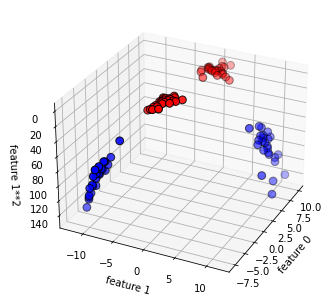

In [4]:
# adding a third feature

import numpy as np
X_new = np.hstack([X, X[:, 1:] ** 2])

print(X_new.shape)
print(X_new.dtype)
print(X_new[:10])


# visualizing using three dimension plot
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1**2')

Text(0.5, 0, 'feature 1**2')

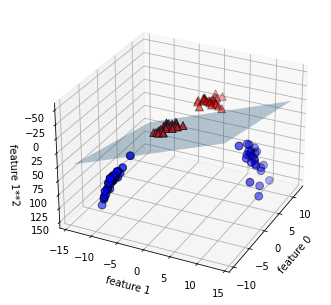

In [5]:
# fitting this new data into a Linear Model
svm3d = LinearSVC().fit(X_new, y)

# visualizing the hyperplane boundary
coef, intercept = svm3d.coef_.ravel(), svm3d.intercept_


figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1**2')

Text(0, 0.5, 'feature 1')

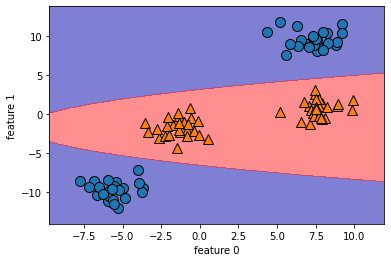

In [6]:
# visualizing the above plot into 2d plot
ZZ = YY ** 2
dec = svm3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## the kernel trick

Text(0, 0.5, 'Feature 1')

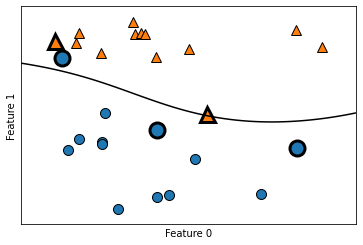

In [9]:
# Using SVC with RBF kernel

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

# the SVC default values
# kernel rbf
# C = 1
# gamma = scale
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)

# visualizing
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
sv_label = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_label, s=15, markeredgewidth=3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

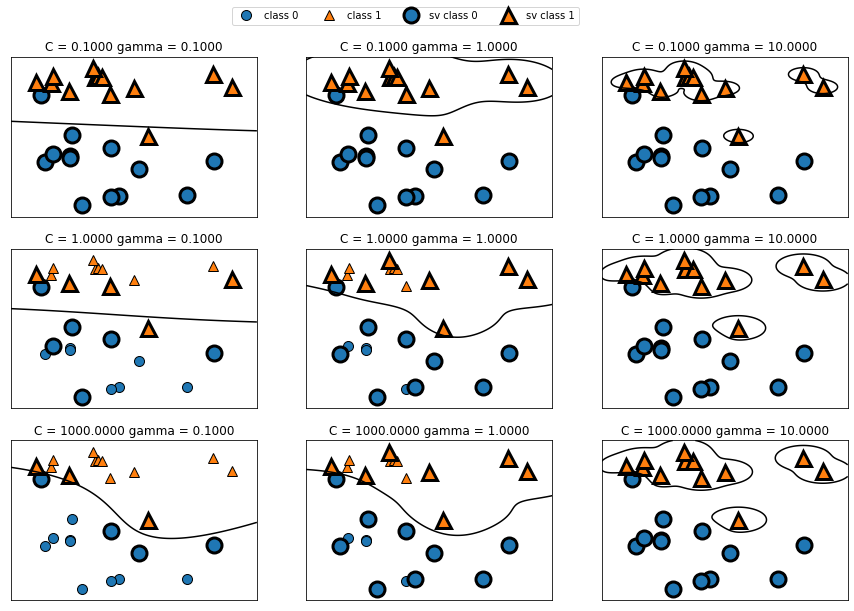

In [14]:
# visualizing SVM with gaussian kernel
# higher C or gamma means more restricted model

fig, axes = plt.subplots(3,3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], loc=(.9, 1.2), ncol=4)

In [19]:
# applying default svm to breast cancer dataset

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC().fit(X_train, y_train)

print('Train accuracy %.3f' % svc.score(X_train, y_train))
print('Test accuracy %.3f' % svc.score(X_test, y_test))

Train accuracy 0.904
Test accuracy 0.937


Text(0, 0.5, 'Feature magnitude')

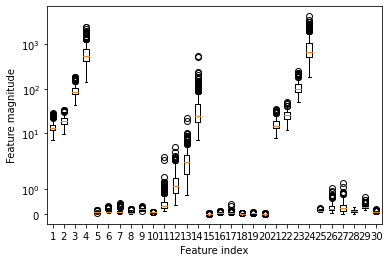

In [21]:
# visualizin the coefficients
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

## Preprocessing data for SVM

In [22]:
# rescaling the feature to range between 0 to 1

min_X_train = X_train.min(axis=0)
range_X_train = (X_train - min_X_train).max(axis=0)

scaled_X_train = (X_train - min_X_train) / range_X_train
scaled_X_test = (X_test - min_X_train) / range_X_train

svc = SVC().fit(scaled_X_train, y_train)

print('Train accuracy %.3f' % svc.score(scaled_X_train, y_train))
print('Test accuracy %.3f' % svc.score(scaled_X_test, y_test))

Train accuracy 0.984
Test accuracy 0.972


In [32]:
svc = SVC(C=10).fit(scaled_X_train, y_train)

print('Train accuracy %.3f' % svc.score(scaled_X_train, y_train))
print('Test accuracy %.3f' % svc.score(scaled_X_test, y_test))

Train accuracy 0.988
Test accuracy 0.972
